<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spotify-Ananlysis-" data-toc-modified-id="Spotify-Ananlysis--1">Spotify Ananlysis <a class="anchor" id="Spotify Analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Import-Spotify-data" data-toc-modified-id="Import-Spotify-data-1.1">Import Spotify data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-1.2">Clean Data</a></span></li><li><span><a href="#Split-the-data-into-Train-and-Test-set-70/30" data-toc-modified-id="Split-the-data-into-Train-and-Test-set-70/30-1.3">Split the data into Train and Test set 70/30</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-1.4">Remove Outliers</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.5">Data Exploration</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Model1" data-toc-modified-id="Model1-2.1">Model1</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3">Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Model-1" data-toc-modified-id="Model-1-3.1">Model 1</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-3.2">Model 2</a></span></li><li><span><a href="#Cross-fold-validation" data-toc-modified-id="Cross-fold-validation-3.3">Cross fold validation</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-3.4">Final Model</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4">PCA</a></span></li><li><span><a href="#Decision-Tree-Classification" data-toc-modified-id="Decision-Tree-Classification-5">Decision Tree Classification</a></span><ul class="toc-item"><li><span><a href="#Tree-1" data-toc-modified-id="Tree-1-5.1">Tree 1</a></span></li><li><span><a href="#Prune-Tree" data-toc-modified-id="Prune-Tree-5.2">Prune Tree</a></span></li><li><span><a href="#Finely-Pruned-Tree" data-toc-modified-id="Finely-Pruned-Tree-5.3">Finely Pruned Tree</a></span></li><li><span><a href="#Bagging-with-IPRED" data-toc-modified-id="Bagging-with-IPRED-5.4">Bagging with IPRED</a></span></li><li><span><a href="#Bagging-with-Caret" data-toc-modified-id="Bagging-with-Caret-5.5">Bagging with Caret</a></span></li></ul></li></ul></div>

This project was completed for the Data Mining and Machine Learing1 Module. The data for this projectct was gathered directly from the Spotify API through python requests. The API requests gathered data for the top 1000 songs from each year between 2010 -2022. The python code for the API can be found in the 'SpotifyAPI_request' document. This document performs multiple machine learning analyses on the data gathered from the API requests. The data is first imported, cleaned and analysed using data visualisations. Support vector Machine, and decision tree analysis is then applied to the data. 

# Spotify Ananlysis <a class=anchor id="Spotify Analysis"></a>

In [404]:
#install.packages('rpart')
library(rpart)
#install.packages('rattle')
library(rattle)
#install.packages('rpart.plot')
library(rpart.plot)
#install.packages('RColorBrewer')
library(RColorBrewer)
install.packages('ISLR')
library(ISLR)
#install.packages('car')
library(car)
#install.packages('caret')
library(caret)
#install.packages('olsrr')
library(olsrr)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('ggthemes')
library(ggthemes)
#install.packages('scales')
library(scales)
#install.packages('Amelia')
library(Amelia)
#install.packages('dplyr')
library(dplyr)
#install.packages('leaps')
library(leaps)
#install.packages('haven')
library(haven)
#install.packages('gridExtra')
library(gridExtra)
#install.packages('regclass')
library(regclass)
#install.packages('purrr')
library(purrr)
#Turn off warnings 
options(warn=-1)
#Turn on warnings 
#options(warn=0)


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘rattle’


The following object is masked from ‘package:randomForest’:

    importance


The following object is masked from ‘package:VGAM’:

    wine





The downloaded binary packages are in
	/var/folders/dj/vbjgymjd4294wgdk6fb2fgjw0000gn/T//RtmpfDdicD/downloaded_packages


## Import Spotify data

In [466]:
#Import data 
data <- read.csv('Spotify.csv')

In [467]:
str(data)

'data.frame':	11580 obs. of  18 variables:
 $ artist_name     : chr  "J. Cole" "Otmar Eros" "Rae Sremmurd" "Midnight Oil" ...
 $ track_name      : chr  "Work Out" "Year 2016:, Pt. 4" "This Could Be Us" "Forgotten Years - 2011 Remaster" ...
 $ track_id        : chr  "2wAJTrFhCnQyNSD3oUgTZO" "1sUxW2zAmXA7lXHC8Dxu4s" "4jTiyLlOJVJj3mCr7yfPQD" "6PrbbxJFuwDUUcgEjZW0jr" ...
 $ popularity      : int  81 24 79 51 84 8 69 23 80 46 ...
 $ danceability    : num  0.831 0.241 0.732 0.497 0.789 0.66 0.604 0.314 0.56 0.418 ...
 $ energy          : num  0.427 0.064 0.69 0.964 0.858 0.876 0.788 0.0855 0.936 0.343 ...
 $ key             : int  2 5 0 11 1 11 0 9 3 4 ...
 $ loudness        : num  -6.9 -24.27 -4.99 -2.65 -5.54 ...
 $ mode            : int  1 1 0 0 1 0 0 1 1 1 ...
 $ speechiness     : num  0.106 0.0602 0.134 0.0703 0.311 0.0563 0.103 0.0342 0.0439 0.0339 ...
 $ acousticness    : num  0.0531 0.994 0.291 0.0149 0.127 0.00724 0.0678 0.969 0.00847 0.741 ...
 $ instrumentalness: num  0.00 9.50e-0

In [410]:
summary(data)

 artist_name         track_name          track_id           popularity    
 Length:11580       Length:11580       Length:11580       Min.   :  0.00  
 Class :character   Class :character   Class :character   1st Qu.:  7.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 51.50  
                                                          Mean   : 40.07  
                                                          3rd Qu.: 70.00  
                                                          Max.   :100.00  
  danceability       energy               key            loudness      
 Min.   :0.000   Min.   :0.0000201   Min.   : 0.000   Min.   :-41.766  
 1st Qu.:0.477   1st Qu.:0.5147500   1st Qu.: 2.000   1st Qu.: -9.168  
 Median :0.590   Median :0.6930000   Median : 6.000   Median : -6.913  
 Mean   :0.586   Mean   :0.6641385   Mean   : 5.278   Mean   : -7.802  
 3rd Qu.:0.707   3rd Qu.:0.8570000   3rd Qu.: 8.000   3rd Qu.: -5.298  
 Max.   :0.985   Max.   :1.0000000   Max.  

## Clean Data

In [267]:
#checking for any missing data - NO MISSING DATA 
sum(is.na(data))

[1] 0

In [468]:
#Convert 0 to M and 1 to F for Gender 
data[data$popularity1 ==0,]$popularity1 <- 'Unpopular'
data[data$popularity1 ==1,]$popularity1 <- 'Popular'

In [469]:
#Convert variables to factors 
data$popularity1 <- as.factor(data$popularity1)
#Convert variables to factors 
data$mode <- as.factor(data$mode)

In [409]:
#Remove unnecessary columns :artist_name track_name track_id popularity
df <- data[ -c(1:4) ]

In [411]:
head(df)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity1
,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.831,0.427,2,-6.903,1,0.1060,0.05310,0.00e+00,0.3070,0.2160,93.004,235320,4,Popular
2,0.241,0.064,5,-24.272,1,0.0602,0.99400,9.50e-01,0.0715,0.0372,141.739,69840,4,Unpopular
3,0.732,0.690,0,-4.992,0,0.1340,0.29100,0.00e+00,0.1160,0.7580,143.072,206307,4,Popular
4,0.497,0.964,11,-2.653,0,0.0703,0.01490,2.07e-06,0.1190,0.5580,152.178,256573,4,Popular
5,0.789,0.858,1,-5.542,1,0.3110,0.12700,0.00e+00,0.3490,0.7750,140.022,219333,4,Popular
6,0.660,0.876,11,-6.553,0,0.0563,0.00724,1.96e-03,0.0432,0.5220,128.688,4317063,4,Unpopular


## Split the data into Train and Test set 70/30

In [470]:
#splitting data into train and test set 
set.seed(15474222)
dt = sort(sample(nrow(df), nrow(df)*.7))
train<-df[dt,]
test <- df[-dt,]
nrow(data)
nrow(train)
nrow(test) 

[1] 11580

[1] 8105

[1] 3475

## Remove Outliers

In [ ]:
df1 <- df
#remove outliers from Original income data
outliers <- boxplot.stats(df1$loudness)$out#Remove outliers from original data 
outliers1 <- boxplot.stats(df1$speechiness)$out  
outliers3 <- boxplot.stats(df1$instrumentalness)$out#Remove outliers from original data 
outliers4 <- boxplot.stats(df1$liveness)$out 
outliers5 <- boxplot.stats(df1$duration_ms)$out 
str(outliers)
str(outliers1)
str(outliers3)
str(outliers4)
str(outliers5)
out <- df1[-which(df1$instrumentalness %in% outliers3),]
out <- out[-which(out$speechiness %in% outliers1),] 
out <- out[-which(out$liveness %in% outliers4),] 
out <- out[-which(out$duration_ms %in% outliers5),]
out <- out[-which(out$loudness %in% outliers),]
nrow(df1)
nrow(out)
ncol(out)

In [ ]:
# Simple Bar Plot 
par(mfrow = c(1, 2))
counts1 <- table(out$popularity1)
barplot(counts1, main="Popularity",
    xlab="Popular/Unpopular",col='pink')

In [ ]:
library(kimisc)
df1 <- sample.rows(subset(out, popularity1 == "Popular"), 2484)
df2 <- sample.rows(subset(out, popularity1 == "Unpopular"), 2484)
df1 <-rbind(df1,df2)

In [ ]:
#splitting data with outliers removed into train and test set 
set.seed(15474222)
dt = sort(sample(nrow(df1), nrow(df1)*.7))
otrain<-df1[dt,]
otest <- df1[-dt,]
nrow(df1)
nrow(otrain)
nrow(otest) 

## Data Exploration

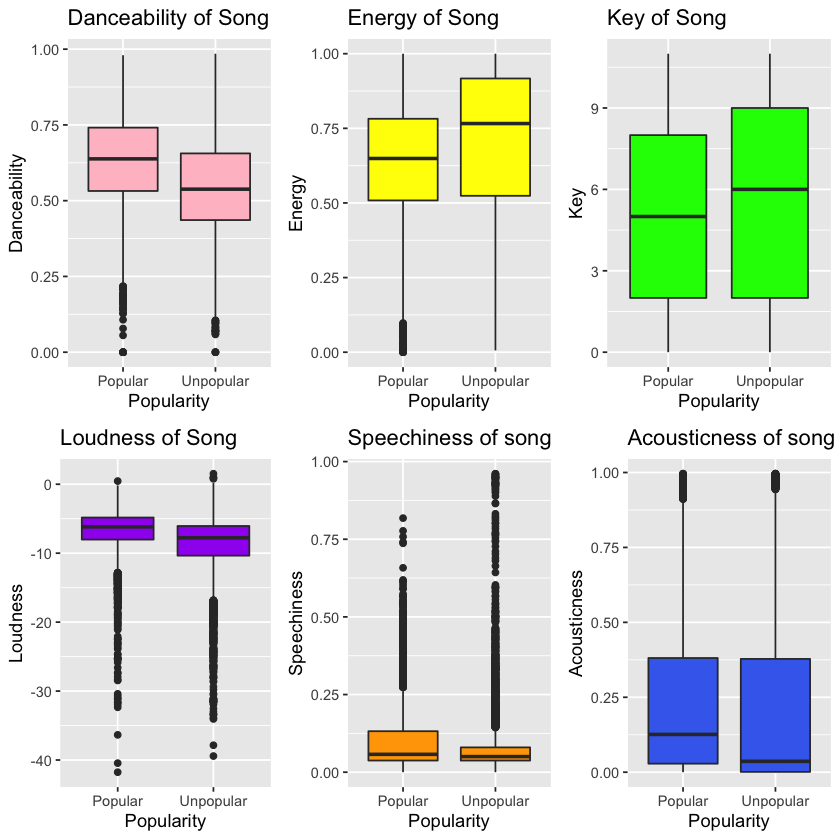

In [208]:
grid.arrange(
ggplot(data, aes(Popularity, danceability)) + 
  geom_boxplot(fill='pink') +
  ggtitle("Danceability of Song") + 
  ylab("Danceability"),

ggplot(data, aes(Popularity, energy)) + 
  geom_boxplot(fill='yellow') +
  ggtitle("Energy of Song") + 
  ylab("Energy"),

ggplot(data, aes(Popularity, key)) + 
  geom_boxplot(fill='green') +
  ggtitle("Key of Song") + 
  ylab("Key"),

ggplot(data, aes(Popularity, loudness)) + 
  geom_boxplot(fill='purple') +
  ggtitle("Loudness of Song") + 
  ylab("Loudness"),

ggplot(data, aes(Popularity, speechiness)) + 
  geom_boxplot(fill='orange') +
  ggtitle("Speechiness of song") + 
  ylab("Speechiness"),
    
ggplot(data, aes(Popularity, acousticness)) + 
  geom_boxplot(fill='royalblue2') +
  ggtitle("Acousticness of song") + 
  ylab("Acousticness"),
ncol = 3)

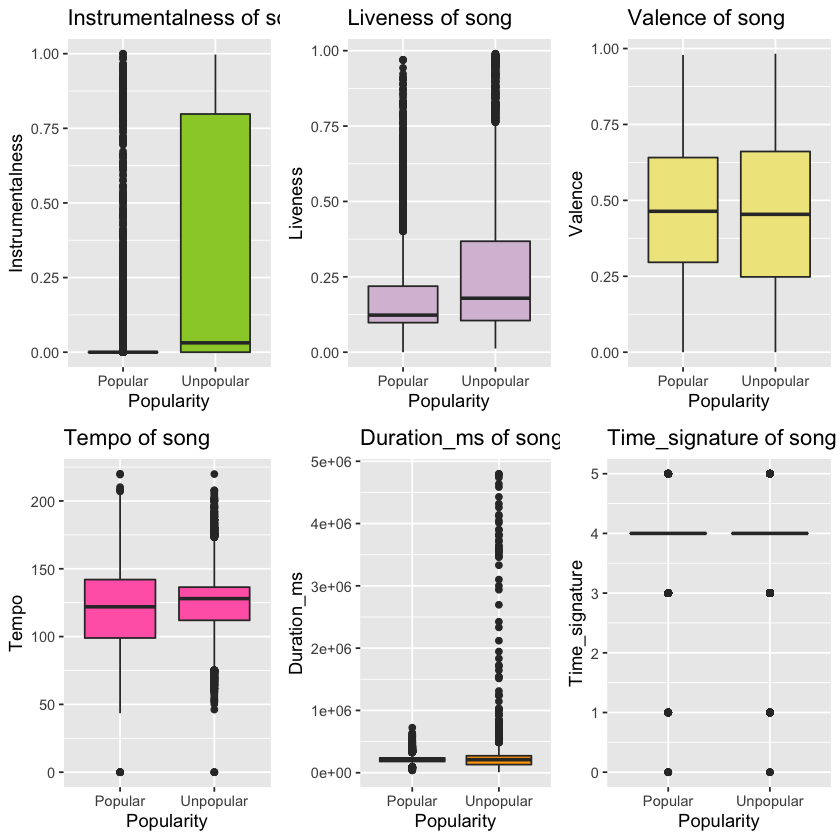

In [209]:
grid.arrange(

ggplot(data, aes(Popularity, instrumentalness)) + 
  geom_boxplot(fill='olivedrab3') +
  ggtitle("Instrumentalness of song") + 
  ylab("Instrumentalness"),

ggplot(data, aes(Popularity, liveness)) + 
  geom_boxplot(fill='thistle') +
  ggtitle("Liveness of song") + 
  ylab("Liveness"),

ggplot(data, aes(Popularity, valence)) + 
  geom_boxplot(fill='khaki') +
  ggtitle("Valence of song") + 
  ylab("Valence"),

ggplot(data, aes(Popularity, tempo)) + 
  geom_boxplot(fill='hotpink') +
  ggtitle("Tempo of song") + 
  ylab("Tempo"),

ggplot(data, aes(Popularity, duration_ms)) + 
  geom_boxplot(fill='orange') +
  ggtitle("Duration_ms of song") + 
  ylab("Duration_ms"),

ggplot(data, aes(Popularity, time_signature)) + 
  geom_boxplot(fill='yellow') +
  ggtitle("Time_signature of song") + 
  ylab("Time_signature"),
ncol = 3)

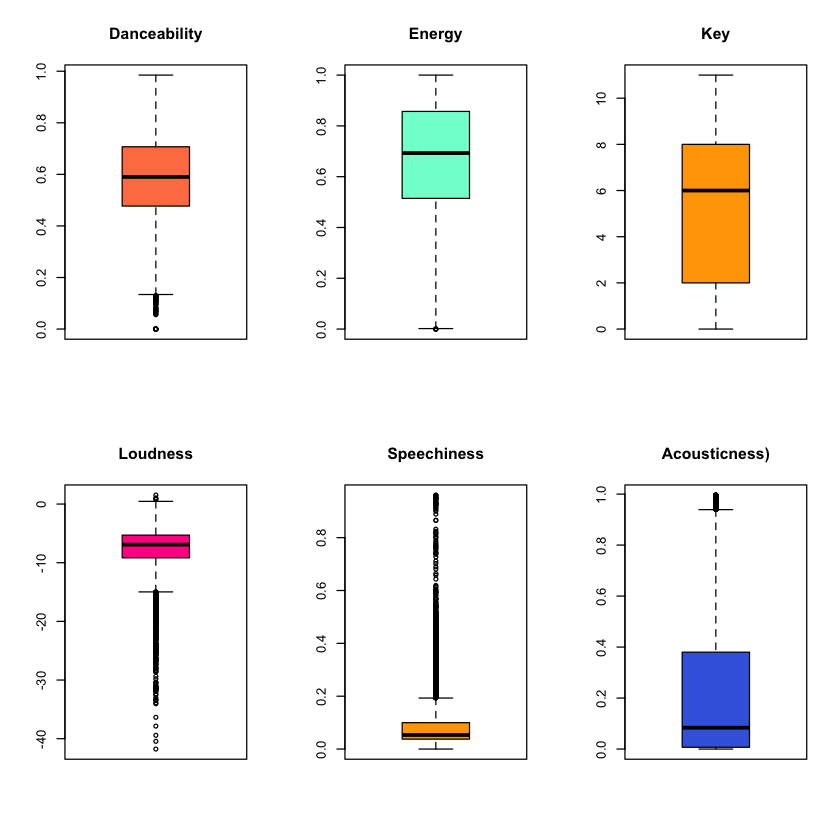

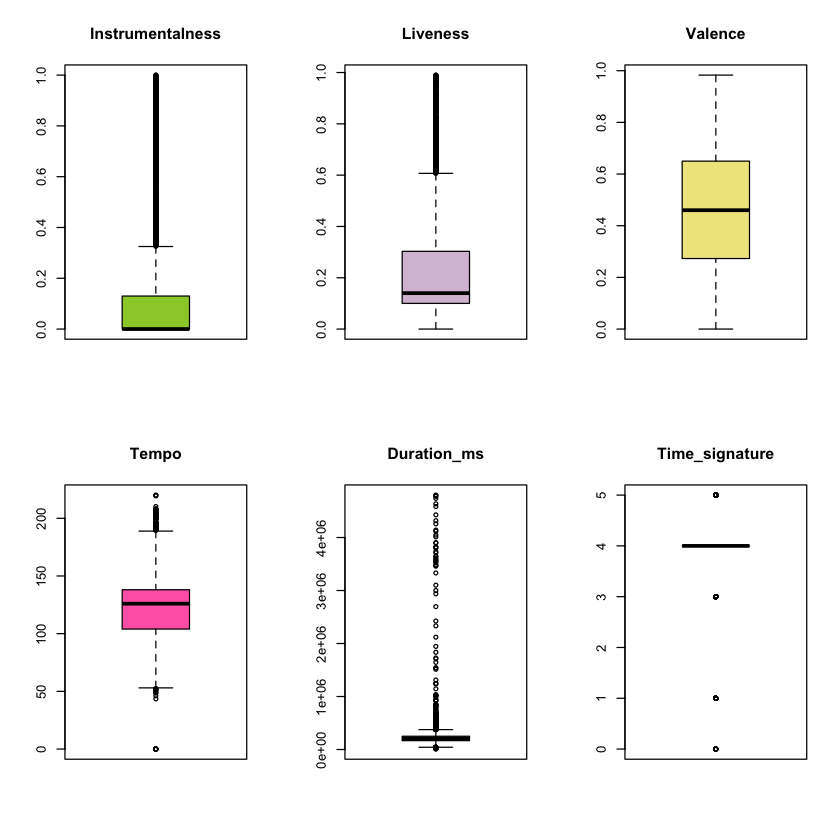

In [211]:
#Boxplot - of non catagorical variables 
# check variables for normality 
par(mfrow = c(2, 3)) # Create a 4 x 3 plotting matrix
boxplot(data$danceability, main = "Danceability", col = 'coral')
boxplot(data$energy, main = "Energy", col = 'aquamarine')
boxplot(data$key, main = "Key", col = 'orange')
boxplot(data$loudness, main = "Loudness", col = 'deeppink')
boxplot(data$speechiness, main = "Speechiness", col = 'orange')
boxplot(data$acousticness, main = "Acousticness)", col = 'royalblue')
boxplot(data$instrumentalness, main = "Instrumentalness",  col = 'olivedrab3')
boxplot(data$liveness, main = "Liveness",  col = 'thistle')
boxplot(data$valence, main = "Valence",  col = 'khaki')
boxplot(data$tempo, main = "Tempo",  col = 'hotpink')
boxplot(data$duration_ms, main = "Duration_ms",  col = 'orange')
boxplot(data$time_signature, main = "Time_signature", col = 'yellow')

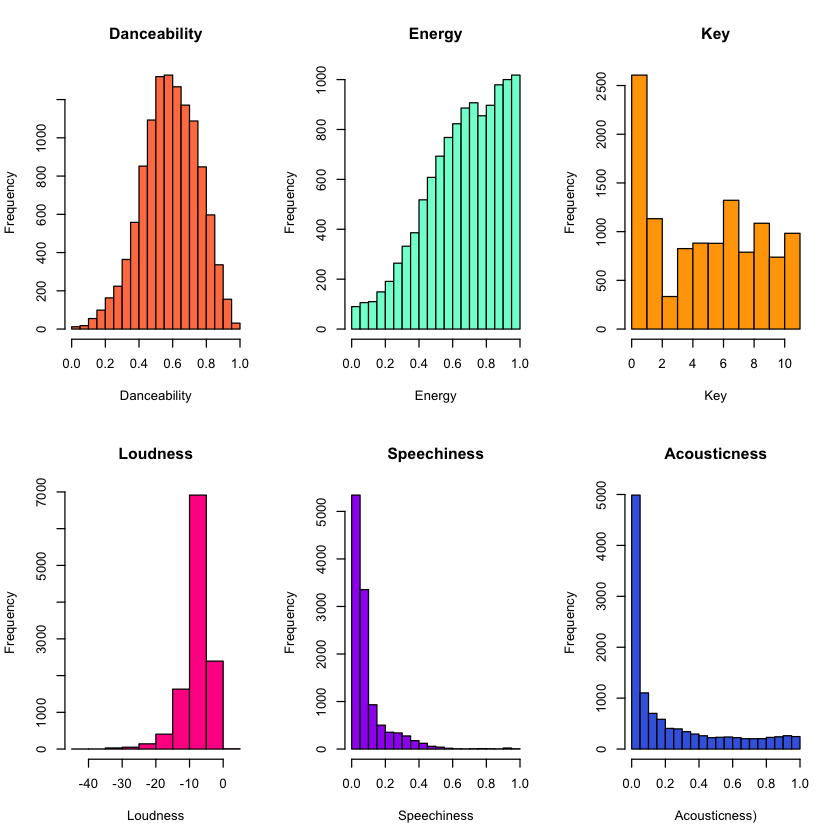

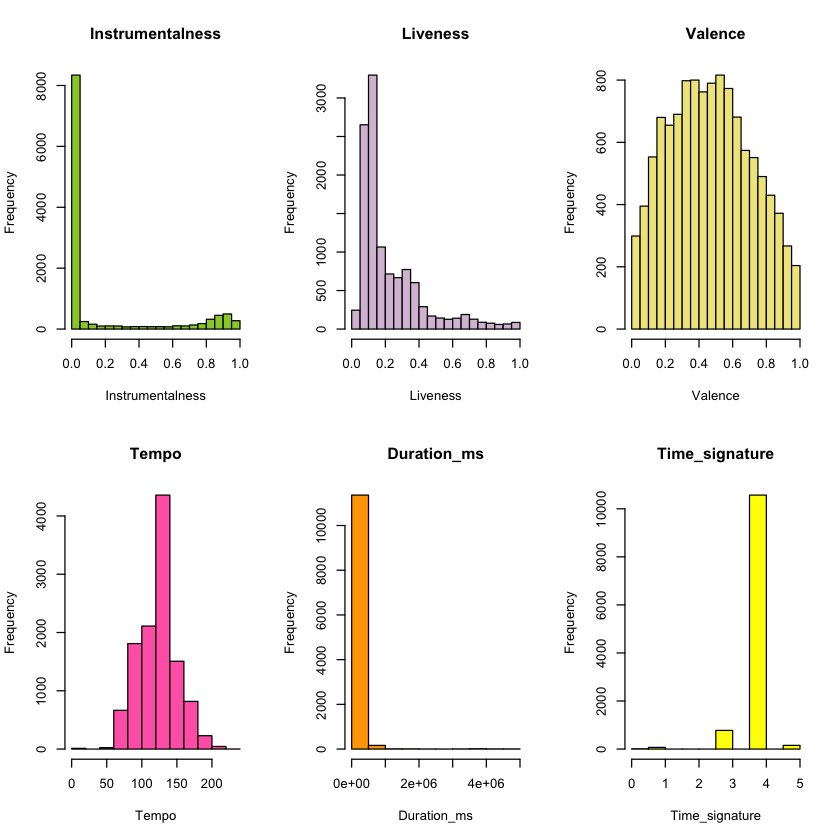

In [213]:
#Boxplot - of non catagorical variables 
# check variables for normality 
par(mfrow = c(2, 3)) # Create a 4 x 3 plotting matrix
hist(data$danceability, xlab = "Danceability", main = "Danceability",col = 'coral')
hist(data$energy, xlab = "Energy", main = "Energy", col = 'aquamarine')
hist(data$key, xlab = "Key", main = "Key", col = 'orange')
hist(data$loudness, xlab = "Loudness", main = "Loudness", col = 'deeppink')
hist(data$speechiness, xlab = "Speechiness", main = "Speechiness", col = 'purple')
hist(data$acousticness, xlab = "Acousticness)", main = "Acousticness", col = 'royalblue')
hist(data$instrumentalness, xlab = "Instrumentalness", main = "Instrumentalness", col = 'olivedrab3')
hist(data$liveness, xlab = "Liveness", main = "Liveness", col = 'thistle')
hist(data$valence, xlab = "Valence", main = "Valence", col = 'khaki')
hist(data$tempo, xlab = "Tempo", main = "Tempo", col = 'hotpink')
hist(data$duration_ms, xlab = "Duration_ms", main = "Duration_ms", col = 'orange')
hist(data$time_signature, xlab = "Time_signature", main = "Time_signature", col = 'yellow')

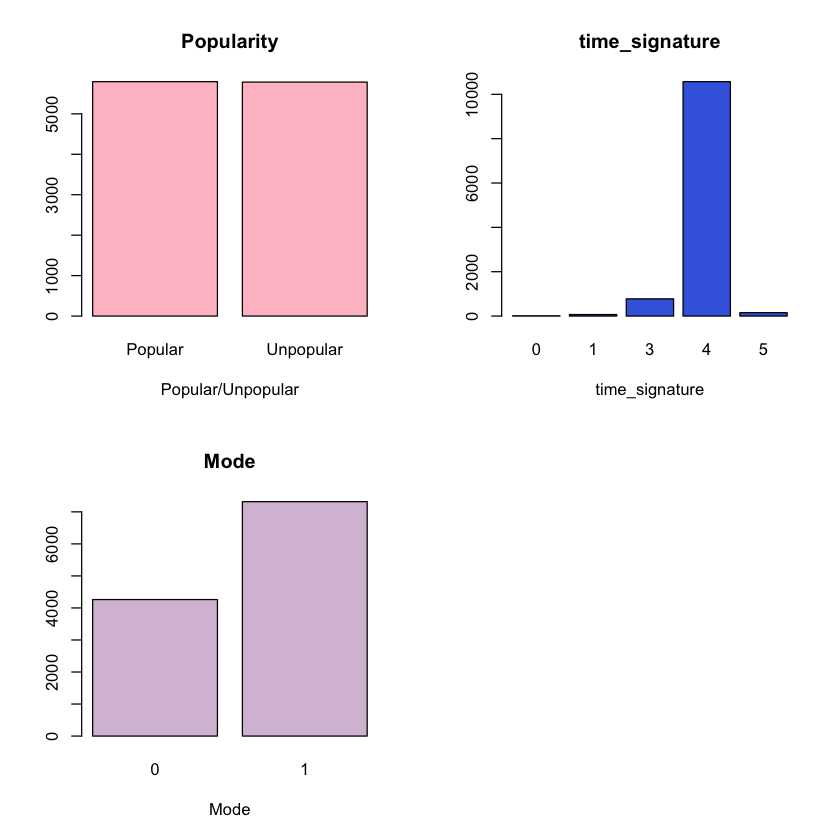

In [210]:
# Simple Bar Plot 
par(mfrow = c(2, 2))
counts1 <- table(data$Popularity)
barplot(counts1, main="Popularity", 
   xlab="Popular/Unpopular",col='pink')
counts2 <- table(data$time_signature)
barplot(counts2, main="time_signature", 
   xlab="time_signature",col='royalblue')
counts3 <- table(data$mode)
barplot(counts3, main="Mode", 
   xlab="Mode",col='thistle')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity1
danceability,1.00,0.01,0.01,0.22,-0.06,0.19,-0.13,-0.21,-0.21,0.34,-0.08,-0.05,0.16,0.27
energy,0.01,1.00,0.06,0.67,-0.12,0.01,-0.70,0.07,0.20,0.29,0.22,-0.02,0.19,-0.14
key,0.01,0.06,1.00,0.02,-0.17,0.02,-0.02,0.03,-0.01,0.04,0.02,0.01,0.01,-0.01
loudness,0.22,0.67,0.02,1.00,-0.06,-0.01,-0.53,-0.32,0.00,0.27,0.16,-0.05,0.18,0.25
mode,-0.06,-0.12,-0.17,-0.06,1.00,-0.05,0.11,-0.06,-0.02,0.00,-0.02,0.00,-0.01,0.02
speechiness,0.19,0.01,0.02,-0.01,-0.05,1.00,0.02,-0.14,0.10,0.01,0.04,-0.01,0.02,0.10


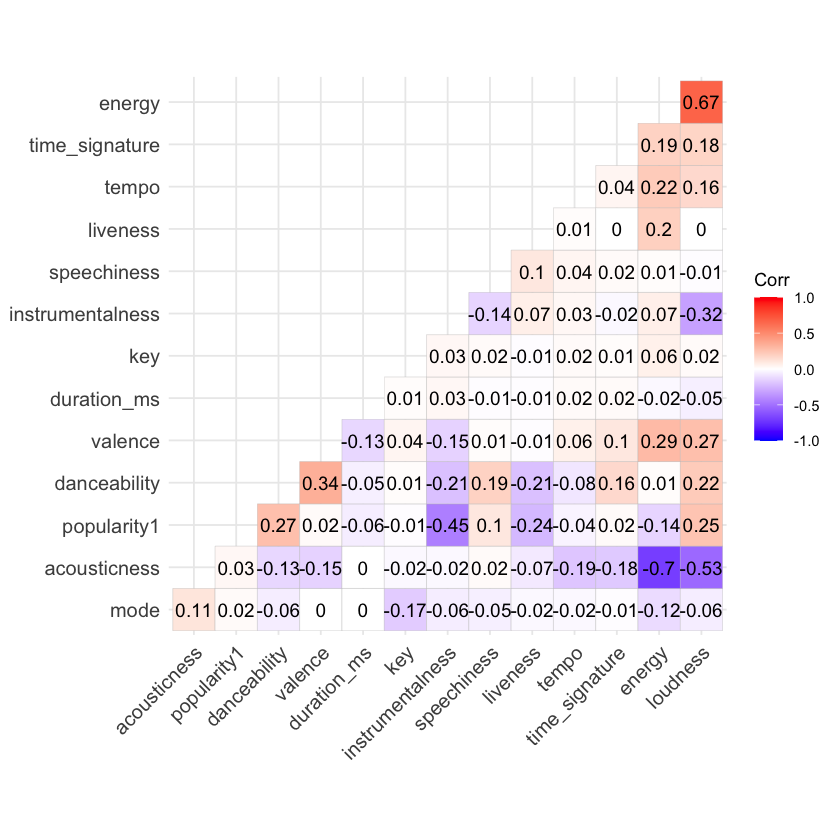

In [69]:
#correlation matrix ### checking variables for multicoliniarity  
library(ggcorrplot)
#Data needs to be all numeric
corr <- round(cor(df, method = 'pearson'), digits = 2)
head(corr[])
ggcorrplot(corr, hc.order = TRUE, type = "lower",
           lab = TRUE)

# Logistic Regression

## Model1

In [313]:
fit1 <- glm(popularity1 ~+danceability +loudness 
            +acousticness +instrumentalness 
            +log(liveness) +log(speechiness) +valence +energy, 
            data=otrain, family='binomial')

In [314]:
summary(fit1)


Call:
glm(formula = popularity1 ~ +danceability + loudness + acousticness + 
    instrumentalness + log(liveness) + log(speechiness) + valence + 
    energy, family = "binomial", data = otrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6027  -0.9724  -0.2230   0.9690   2.4819  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.16586    0.54531 -11.307  < 2e-16 ***
danceability     -2.42222    0.30626  -7.909 2.59e-15 ***
loudness         -0.39839    0.02277 -17.495  < 2e-16 ***
acousticness      1.01666    0.19430   5.232 1.67e-07 ***
instrumentalness  5.51647    0.98393   5.607 2.06e-08 ***
log(liveness)     0.30979    0.06350   4.879 1.07e-06 ***
log(speechiness) -0.36501    0.08045  -4.537 5.71e-06 ***
valence           1.05606    0.18817   5.612 2.00e-08 ***
energy            5.32099    0.37112  14.338  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for bi

In [317]:
#Prediction 
p <- predict(fit1, otest, type='response')
pred <- ifelse(p>0.5, 1, 0)
tab<- table(Predicted=pred, Actual=otest$popularity1)
tab
sum(diag(tab))/sum(tab)
#71% acuracy

         Actual
Predicted Popular Unpopular
        0     536       224
        1     208       523

[1] 0.7102616

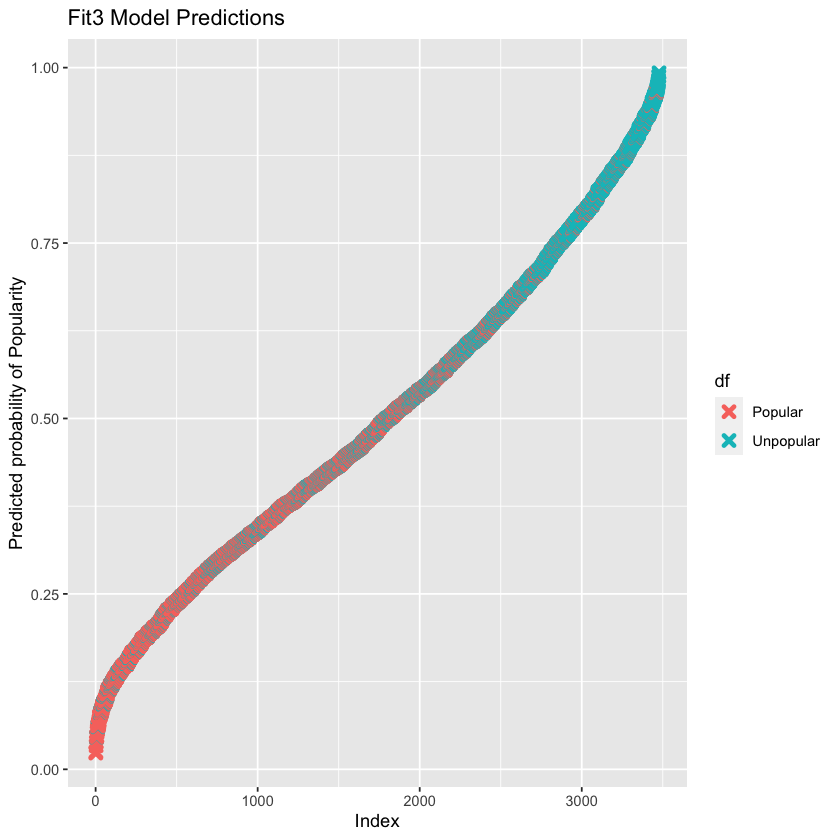

In [318]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.df=fit1$fitted.values,
  df=otrain$popularity1)
 
predicted.data <- predicted.data[
  order(predicted.data$probability.of.df, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
 
## Lastly, we can plot the predicted probabilities for each sample
ggplot(data=predicted.data, aes(x=rank, y=probability.of.df)) +
  geom_point(aes(color=df), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of Popularity")+
  ggtitle('Fit3 Model Predictions')

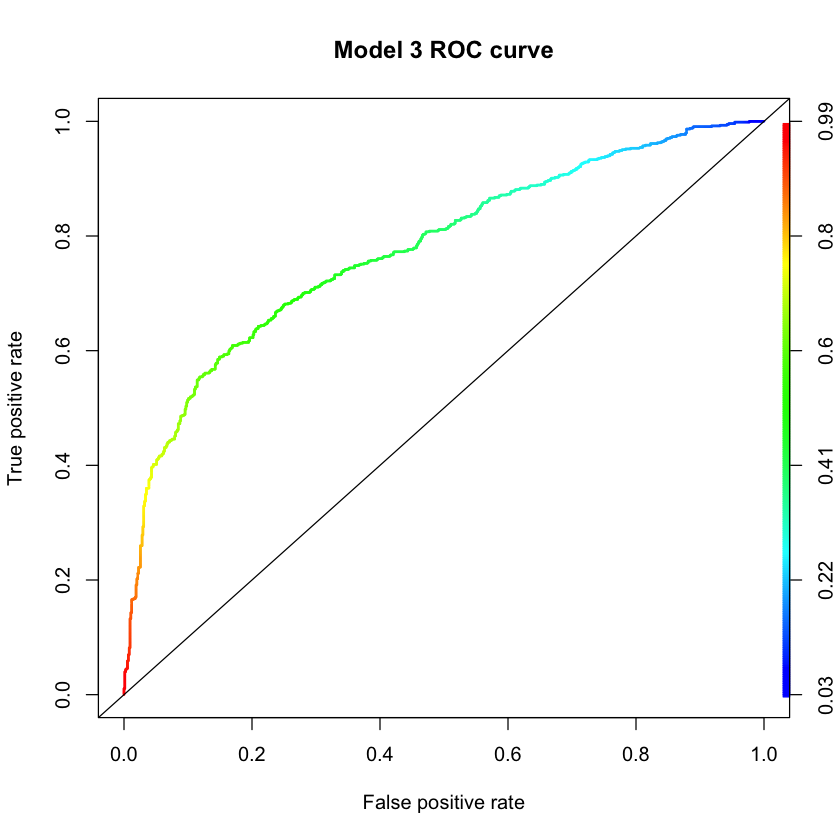

In [320]:
library("ROCR")
pred <- predict(fit3, otest, type = "response")
pred <- prediction(pred, otest$popularit11)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Model 1 ROC curve")
abline(a = 0, b = 1)

# Support Vector Machine

In [82]:
library('e1071')

## Model 1

In [323]:
mod1 =svm(popularity1~., data=otrain)

In [324]:
summary(mod1)


Call:
svm(formula = popularity1 ~ ., data = otrain)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2133

 ( 1059 1074 )


Number of Classes:  2 

Levels: 
 Popular Unpopular




In [334]:
#print params
mod1$cost
mod1$gamma

[1] 1

[1] 0.07142857

In [400]:
pred1 <- predict(mod1, newdata = otest)
confusionMatrix(pred11, otest$popularity1, mode = "everything")
#78% Accurate

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular       610       190
  Unpopular     134       557
                                          
               Accuracy : 0.7827          
                 95% CI : (0.7609, 0.8034)
    No Information Rate : 0.501           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5655          
                                          
 Mcnemar's Test P-Value : 0.002246        
                                          
            Sensitivity : 0.8199          
            Specificity : 0.7456          
         Pos Pred Value : 0.7625          
         Neg Pred Value : 0.8061          
              Precision : 0.7625          
                 Recall : 0.8199          
                     F1 : 0.7902          
             Prevalence : 0.4990          
         Detection Rate : 0.4091          
   Detection Prevalence : 0.5366       

## Model 2

In [331]:
#change the kernel type to linear to try and improve performance 
mod2 =svm(popularity1~.,
           data=otrain,
         kernel='linear')

In [332]:
summary(mod2)


Call:
svm(formula = popularity1 ~ ., data = otrain, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  2387

 ( 1197 1190 )


Number of Classes:  2 

Levels: 
 Popular Unpopular




In [395]:
test_pred <- predict(mod2, newdata = otest)
confusionMatrix(test_pred, otest$popularity1, mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular       555       241
  Unpopular     189       506
                                          
               Accuracy : 0.7116          
                 95% CI : (0.6879, 0.7345)
    No Information Rate : 0.501           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.4233          
                                          
 Mcnemar's Test P-Value : 0.01392         
                                          
            Sensitivity : 0.7460          
            Specificity : 0.6774          
         Pos Pred Value : 0.6972          
         Neg Pred Value : 0.7281          
              Precision : 0.6972          
                 Recall : 0.7460          
                     F1 : 0.7208          
             Prevalence : 0.4990          
         Detection Rate : 0.3722          
   Detection Prevalence : 0.5339       

## Cross fold validation

In [ ]:
Tune the model - Cross fold validation 

In [378]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(15474222)

In [380]:
set.seed(15474222)
svm_Radial <- train(popularity1 ~., data = otrain, method = "svmRadial",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [382]:
svm_Radial

Support Vector Machines with Radial Basis Function Kernel 

3477 samples
  13 predictor
   2 classes: 'Popular', 'Unpopular' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3130, 3129, 3130, 3129, 3129, 3129, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.7504585  0.5009005
    0.50  0.7545803  0.5091451
    1.00  0.7574566  0.5149022
    2.00  0.7567861  0.5135607
    4.00  0.7555398  0.5110659
    8.00  0.7485375  0.4970577
   16.00  0.7420197  0.4840177
   32.00  0.7349241  0.4698189
   64.00  0.7266830  0.4533379
  128.00  0.7210273  0.4420375

Tuning parameter 'sigma' was held constant at a value of 0.05940021
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.05940021 and C = 1.

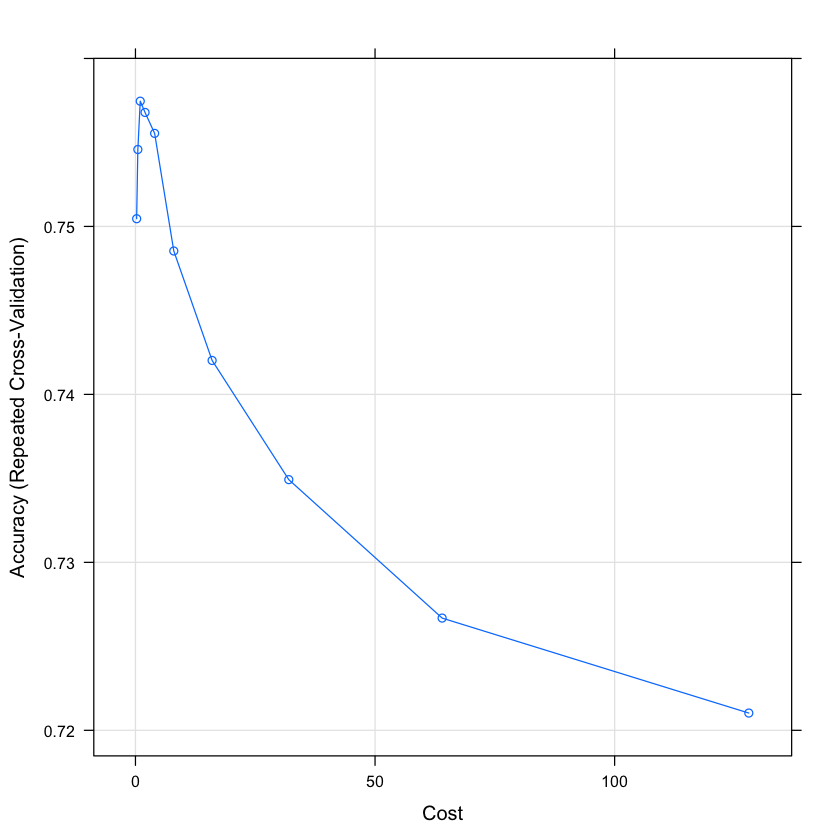

In [381]:
plot(svm_Radial)

In [396]:
test_pred_Radial <- predict(svm_Radial, newdata = otest)
confusionMatrix(test_pred_Radial, otest$popularity1, mode = "everything" )
#78%

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular       609       188
  Unpopular     135       559
                                         
               Accuracy : 0.7834         
                 95% CI : (0.7616, 0.804)
    No Information Rate : 0.501          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5668         
                                         
 Mcnemar's Test P-Value : 0.003811       
                                         
            Sensitivity : 0.8185         
            Specificity : 0.7483         
         Pos Pred Value : 0.7641         
         Neg Pred Value : 0.8055         
              Precision : 0.7641         
                 Recall : 0.8185         
                     F1 : 0.7904         
             Prevalence : 0.4990         
         Detection Rate : 0.4085         
   Detection Prevalence : 0.5345         
      Balanced A

## Final Model

In [388]:
radial.grid = expand.grid(sigma = c(0,0.01, 0.02, 0.025, 0.03, 0.04,
 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.25, 0.5, 0.75,0.9),
 C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
 1, 1.5, 2,5)) 
set.seed(15474222)
Radial_Grid = train(popularity1 ~., data = otrain, method = "svmRadial",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneGrid = radial.grid,
                    tuneLength = 10)

Radial_Grid

Support Vector Machines with Radial Basis Function Kernel 

3477 samples
  13 predictor
   2 classes: 'Popular', 'Unpopular' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3130, 3129, 3130, 3129, 3129, 3129, ... 
Resampling results across tuning parameters:

  sigma  C     Accuracy   Kappa       
  0.000  0.00        NaN           NaN
  0.000  0.01  0.5004323  0.0000000000
  0.000  0.05  0.5004323  0.0000000000
  0.000  0.10  0.5004323  0.0000000000
  0.000  0.25  0.5004323  0.0000000000
  0.000  0.50  0.5004323  0.0000000000
  0.000  0.75  0.5004323  0.0000000000
  0.000  1.00  0.5004323  0.0000000000
  0.000  1.50  0.5004323  0.0000000000
  0.000  2.00  0.5004323  0.0000000000
  0.000  5.00  0.5004323  0.0000000000
  0.010  0.00        NaN           NaN
  0.010  0.01  0.5147181  0.0286304685
  0.010  0.05  0.6922679  0.3844176243
  0.010  0.10  0.7062633  0.4124437996
  0.010  0.25  0.7174774  0.43489283

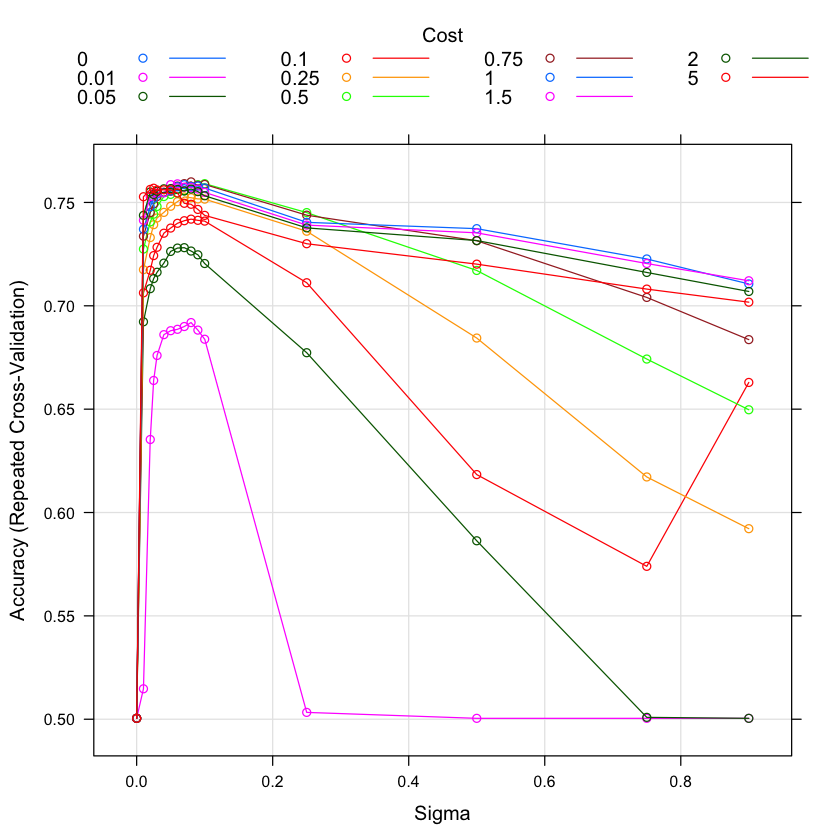

In [389]:
plot(Radial_Grid)

In [397]:
test_pred_Radial <- predict(Radial_Grid, newdata = otest)
confusionMatrix(test_pred_Radial, otest$popularity1, mode = "everything" )
#78.4%

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular       607       185
  Unpopular     137       562
                                          
               Accuracy : 0.784           
                 95% CI : (0.7623, 0.8047)
    No Information Rate : 0.501           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5681          
                                          
 Mcnemar's Test P-Value : 0.008813        
                                          
            Sensitivity : 0.8159          
            Specificity : 0.7523          
         Pos Pred Value : 0.7664          
         Neg Pred Value : 0.8040          
              Precision : 0.7664          
                 Recall : 0.8159          
                     F1 : 0.7904          
             Prevalence : 0.4990          
         Detection Rate : 0.4071          
   Detection Prevalence : 0.5312       

# PCA

In [115]:
pc = prcomp(df[,-14],
           centre=TRUE,
           scale.=TRUE)

In [117]:
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6300 1.2596 1.08981 1.05651 1.02131 0.98538 0.96389
Proportion of Variance 0.2044 0.1221 0.09136 0.08586 0.08024 0.07469 0.07147
Cumulative Proportion  0.2044 0.3264 0.41779 0.50365 0.58389 0.65858 0.73005
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.92927 0.91186 0.86339 0.72765 0.61348 0.40383
Proportion of Variance 0.06643 0.06396 0.05734 0.04073 0.02895 0.01254
Cumulative Proportion  0.79647 0.86043 0.91778 0.95851 0.98746 1.00000

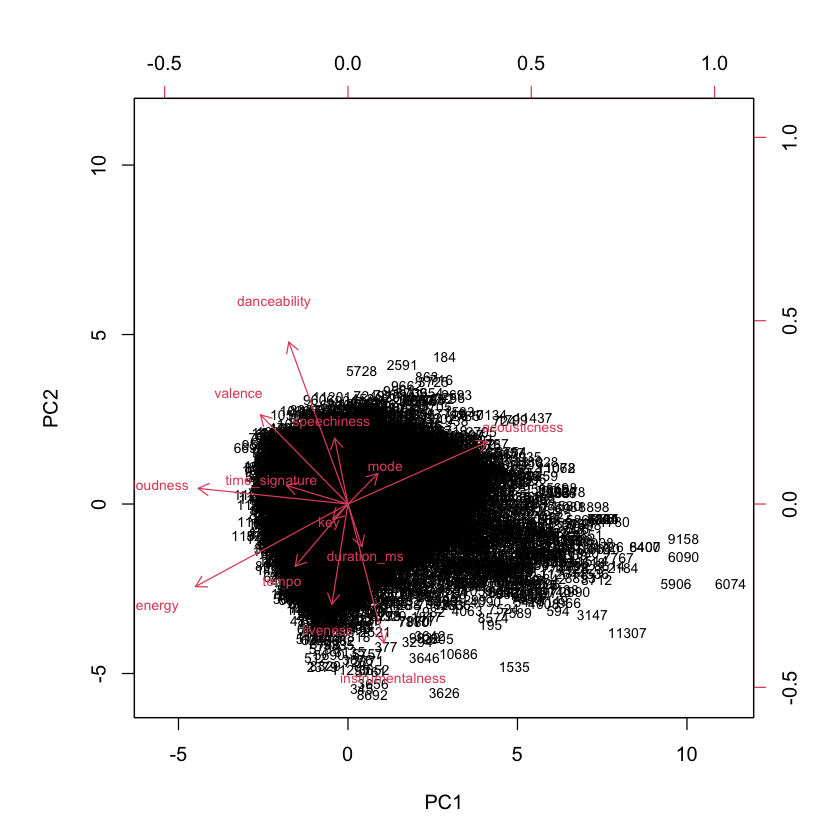

In [122]:
biplot(pc,scale=0, cex=.7)

In [123]:
pcaCharts(pc)

ERROR: Error in pcaCharts(pc): could not find function "pcaCharts"


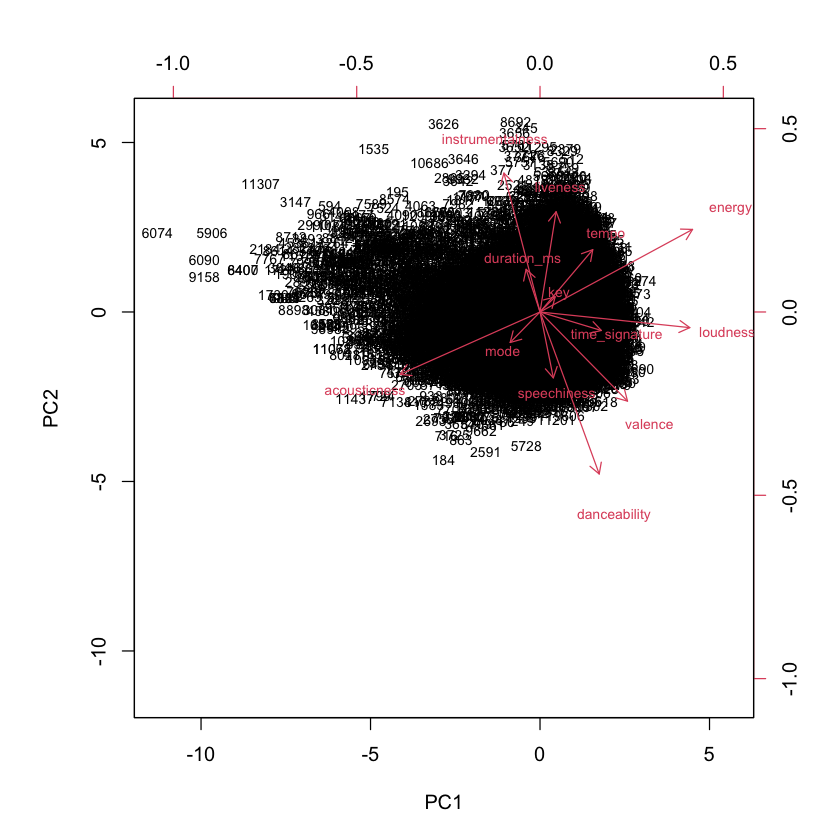

In [124]:
pca.out <- pc
pca.out$rotation <- -pca.out$rotation
pca.out$x <- -pca.out$x
biplot(pca.out,scale=0, cex=.7)

In [120]:
pc

Standard deviations (1, .., p=13):
 [1] 1.6300196 1.2596085 1.0898149 1.0565071 1.0213144 0.9853753 0.9638887
 [8] 0.9292723 0.9118606 0.8633938 0.7276499 0.6134769 0.4038268

Rotation (n x k) = (13 x 13):
                         PC1         PC2           PC3         PC4         PC5
danceability     -0.20182207  0.55240589 -0.1680665951 -0.09060629  0.06834117
energy           -0.51998351 -0.28149272  0.0482158150  0.02331465 -0.05603131
key              -0.05156948 -0.05175534 -0.6398168921 -0.12887893 -0.08570202
loudness         -0.51067771  0.05334121  0.1430697901 -0.02054940  0.03840729
mode              0.10179908  0.10406652  0.6598874251  0.05324390  0.03063029
speechiness      -0.04537703  0.22461805 -0.2709525310  0.68020189  0.26041851
acousticness      0.47703473  0.21252951 -0.0403825520  0.08333730 -0.05410229
instrumentalness  0.12310401 -0.47351405 -0.1617956215 -0.23681424 -0.14914304
liveness         -0.05486151 -0.34168884  0.0170387879  0.62998954 -0.14297908
vale

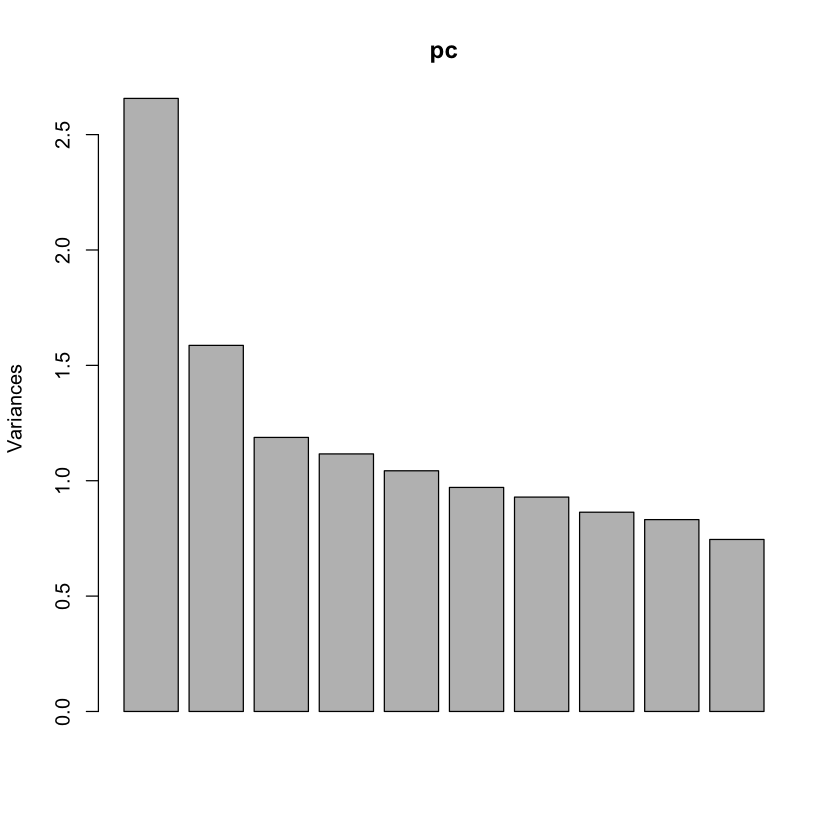

In [119]:
plot(pc)

In [113]:
head(df)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity1
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0.831,0.427,2,-6.903,1,0.1060,0.05310,0.00e+00,0.3070,0.2160,93.004,235320,4,1
2,0.241,0.064,5,-24.272,1,0.0602,0.99400,9.50e-01,0.0715,0.0372,141.739,69840,4,0
3,0.732,0.690,0,-4.992,0,0.1340,0.29100,0.00e+00,0.1160,0.7580,143.072,206307,4,1
4,0.497,0.964,11,-2.653,0,0.0703,0.01490,2.07e-06,0.1190,0.5580,152.178,256573,4,1
5,0.789,0.858,1,-5.542,1,0.3110,0.12700,0.00e+00,0.3490,0.7750,140.022,219333,4,1
6,0.660,0.876,11,-6.553,0,0.0563,0.00724,1.96e-03,0.0432,0.5220,128.688,4317063,4,0


# Decision Tree Classification 

## Tree 1

In [413]:
#training the decision tree classifier 
library(rpart)
tree1 <- rpart(popularity1~., 
               data = train, 
               method="class")
#view summary of the classification tree 
summary(tree1)

Call:
rpart(formula = popularity1 ~ ., data = train, method = "class")
  n= 8105 

          CP nsplit rel error    xerror        xstd
1 0.45362103      0 1.0000000 1.0133929 0.011163777
2 0.03348214      1 0.5463790 0.5510913 0.009960346
3 0.01339286      2 0.5128968 0.5208333 0.009782934
4 0.01004464      3 0.4995040 0.5114087 0.009724641
5 0.01000000      5 0.4794147 0.5114087 0.009724641

Variable importance
instrumentalness     acousticness           energy         loudness 
              46               12               11               10 
     duration_ms         liveness          valence     danceability 
               8                6                4                2 

Node number 1: 8105 observations,    complexity param=0.453621
  predicted class=Popular    expected loss=0.4974707  P(node) =1
    class counts:  4073  4032
   probabilities: 0.503 0.497 
  left son=2 (5010 obs) right son=3 (3095 obs)
  Primary splits:
      instrumentalness < 0.001705  to the left,  impr

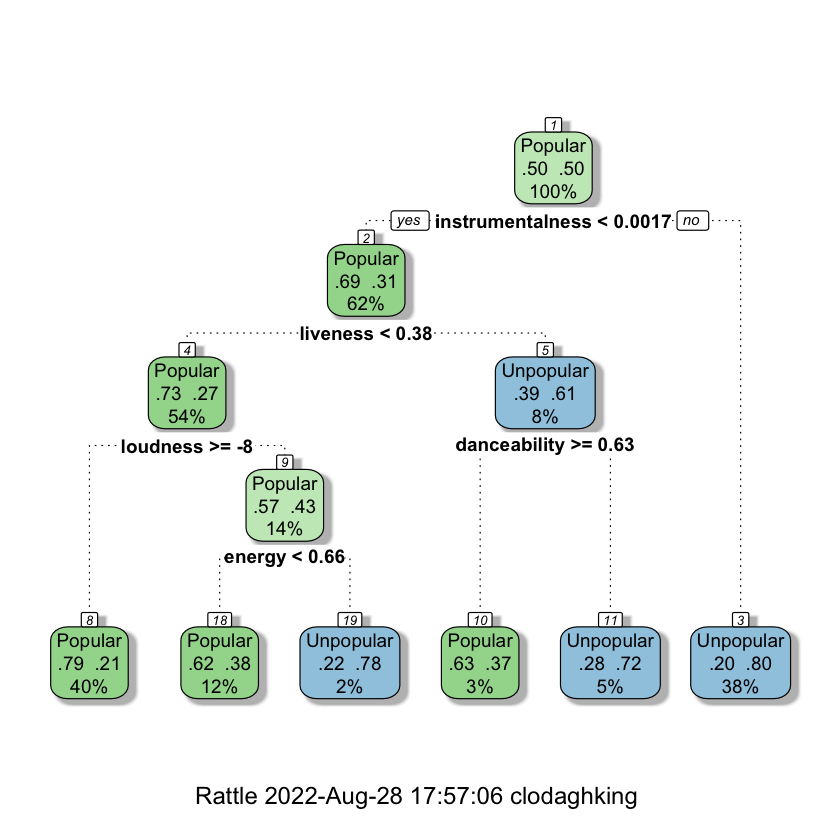

In [414]:
#fancy Plot
fancyRpartPlot(tree1)

In [415]:
#Use the decision tree 'mtree' to make predictions of the test data 
treepred1 <- predict(tree1, test, type = 'class')
confusionMatrix(treepred1 , test$popularity1, mode = "everything")
#overall accuracy 75
#Sensitivity : 0.8014
#Specificity : 0.7017

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular      1380       523
  Unpopular     342      1230
                                          
               Accuracy : 0.7511          
                 95% CI : (0.7364, 0.7654)
    No Information Rate : 0.5045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5026          
                                          
 Mcnemar's Test P-Value : 9.347e-10       
                                          
            Sensitivity : 0.8014          
            Specificity : 0.7017          
         Pos Pred Value : 0.7252          
         Neg Pred Value : 0.7824          
              Precision : 0.7252          
                 Recall : 0.8014          
                     F1 : 0.7614          
             Prevalence : 0.4955          
         Detection Rate : 0.3971          
   Detection Prevalence : 0.5476       

## Prune Tree


Classification tree:
rpart(formula = popularity1 ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] danceability     energy           instrumentalness liveness        
[5] loudness        

Root node error: 4032/8105 = 0.49747

n= 8105 

        CP nsplit rel error  xerror      xstd
1 0.453621      0   1.00000 1.01339 0.0111638
2 0.033482      1   0.54638 0.55109 0.0099603
3 0.013393      2   0.51290 0.52083 0.0097829
4 0.010045      3   0.49950 0.51141 0.0097246
5 0.010000      5   0.47941 0.51141 0.0097246


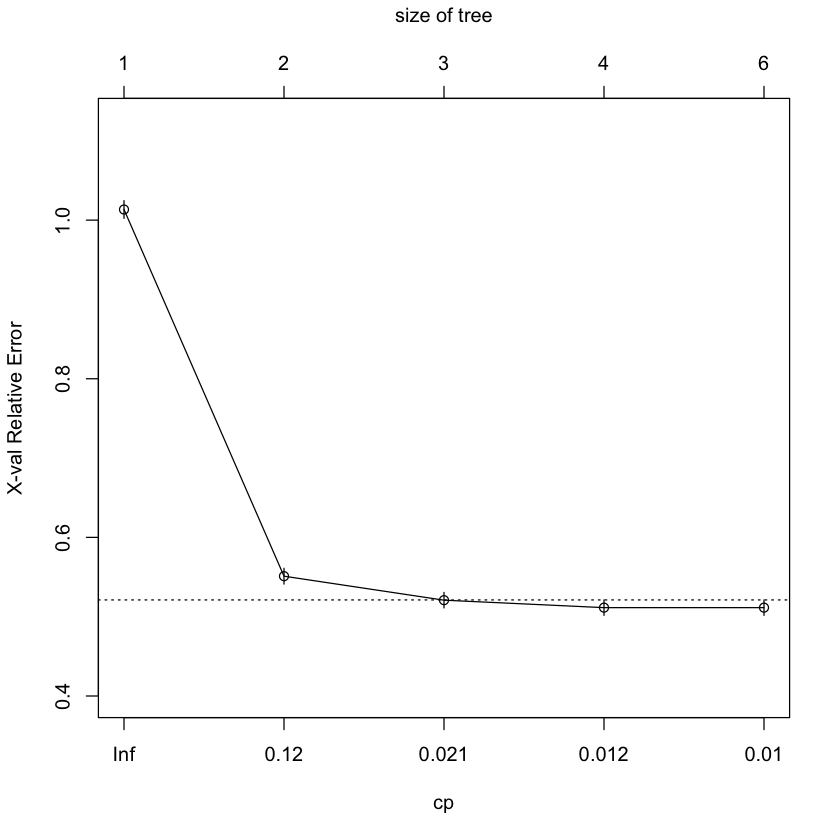

In [416]:
##Step 6: Improve the tree by pruning
#use the cp table to find the relevant cp value to use for pruning the tree 
printcp(tree1) 
plotcp(tree1)
bestcp <- tree1$cptable[which.min(tree1$cptable[,"xerror"]),"CP"] 

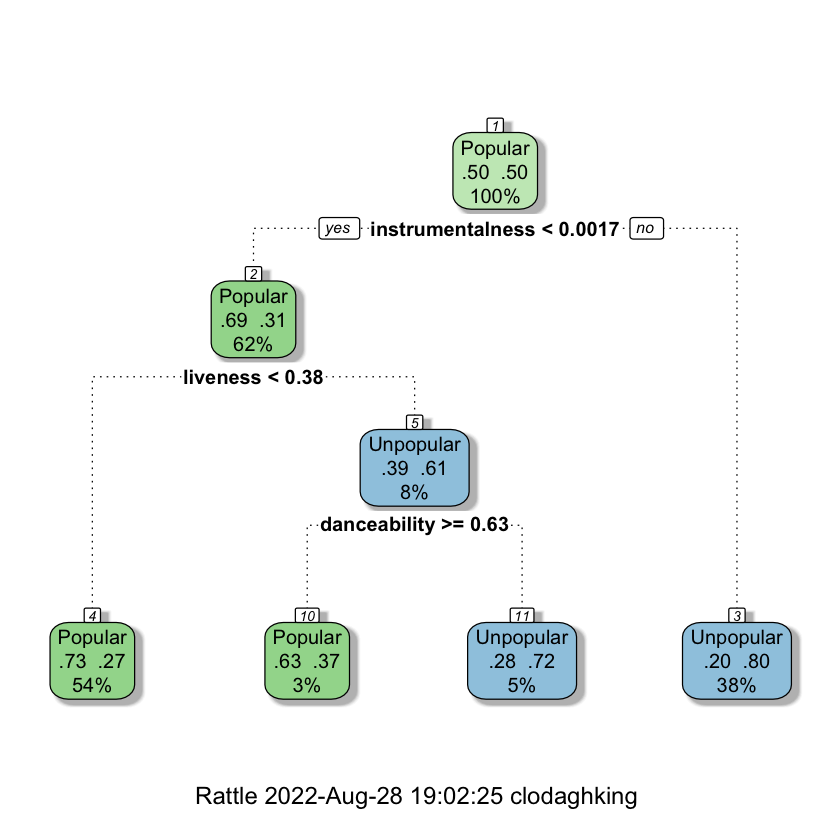

In [446]:
#generate the pruned tree 
pruned_tree <- prune(tree1, cp=0.012)
#fancy pruned tree
fancyRpartPlot(pruned_tree)

In [447]:
#Use the decision tree 'mtree' to make predictions of the test data 
prunedpred <- predict(pruned_tree, test, type = 'class')
confusionMatrix(prunedpred , test$popularity1, mode = "everything")
#overall accuracy 75
#Sensitivity : 0.8014
#Specificity : 0.7017

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular      1393       568
  Unpopular     329      1185
                                         
               Accuracy : 0.7419         
                 95% CI : (0.727, 0.7564)
    No Information Rate : 0.5045         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4843         
                                         
 Mcnemar's Test P-Value : 1.917e-15      
                                         
            Sensitivity : 0.8089         
            Specificity : 0.6760         
         Pos Pred Value : 0.7104         
         Neg Pred Value : 0.7827         
              Precision : 0.7104         
                 Recall : 0.8089         
                     F1 : 0.7564         
             Prevalence : 0.4955         
         Detection Rate : 0.4009         
   Detection Prevalence : 0.5643         
      Balanced A

A performance instance
  'Area under the ROC curve'

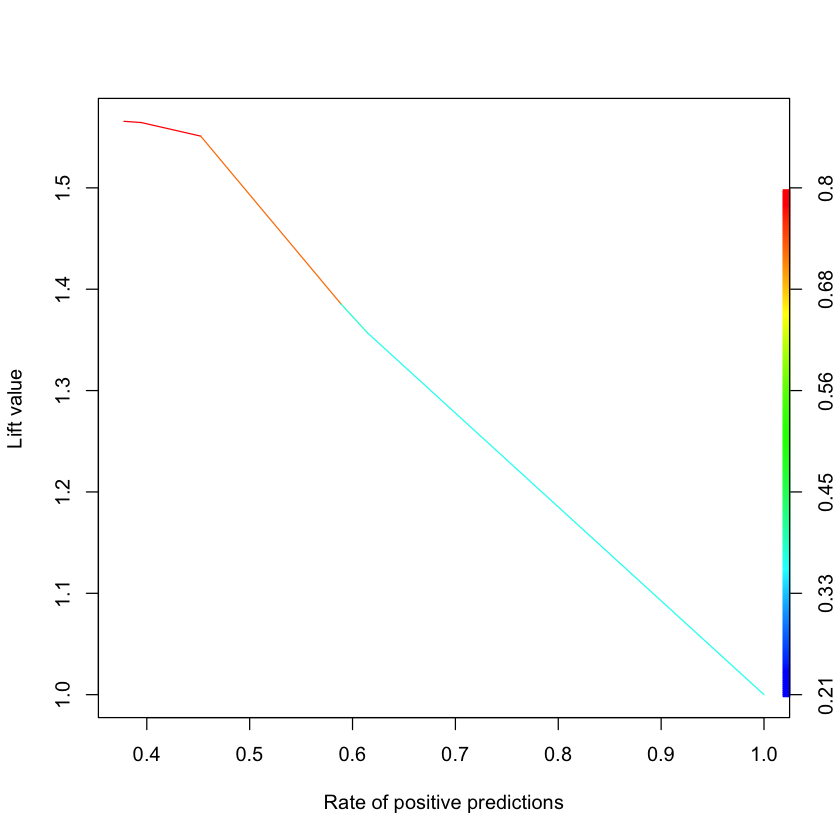

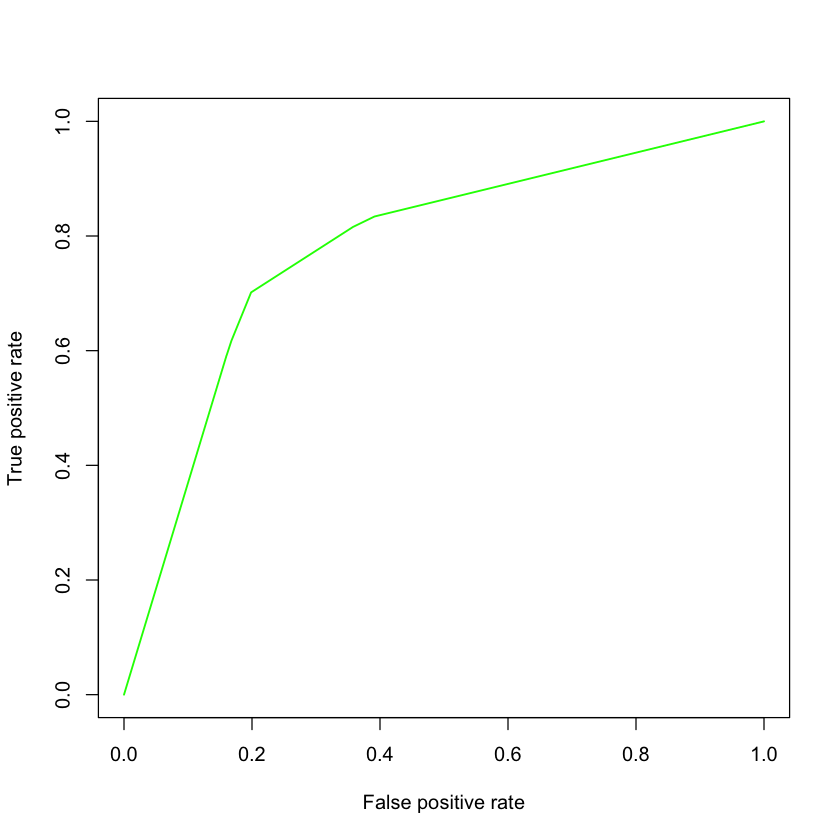

In [428]:
### ROC Curve
library(ROCR)
val1 <- predict(pruned_tree,test,type="prob")
#val1 <- predict(pruned_tree, test, type = 'class')
#Storing model performance scores
pred_val <- prediction(val1[,2],test$popularity)
#calculating area under curve
perf_val <- performance(pred_val,"auc")
perf_val
##plot the performance
plot(performance(pred_val,measure="lift",x.measure="rpp"),colorize=TRUE)
###True positive and false positive rate
perf_val <- performance(pred_val, "tpr","fpr")
plot(perf_val, col = "green", lwd= 1.5)

## Finely Pruned Tree 

In [458]:
#parameters for split and depth
grid <- expand.grid(
  minsplit = seq(5, 20, 1),
  maxdepth = seq(8, 15, 1)
)

head(grid)
models <- list()

for (i in 1:nrow(grid)) {
  
  # get minsplit, maxdepth values at row i
  minsplit <- grid$minsplit[i]
  maxdepth <- grid$maxdepth[i]

  # train a model and store in the list
  models[[i]] <- rpart(
    formula = popularity1 ~ .,
    data    = train,
    method  = "class",
    control = list(minsplit = minsplit, maxdepth = maxdepth)
    )
}
# function to get optimal cp
get_cp <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  cp <- x$cptable[min, "CP"] 
}

# function to get minimum error
get_min_error <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  xerror <- x$cptable[min, "xerror"] 
}

grid %>%
  mutate(
    cp    = purrr::map_dbl(models, get_cp),
    error = purrr::map_dbl(models, get_min_error)
    ) %>%
  arrange(error) %>%
  top_n(-5, wt = error)



,minsplit,maxdepth
,<dbl>,<dbl>
1,5,8
2,6,8
3,7,8
4,8,8
5,9,8
6,10,8


minsplit,maxdepth,cp,error
<dbl>,<dbl>,<dbl>,<dbl>
5,14,0.01,0.5002480
18,13,0.01,0.5017361
19,15,0.01,0.5024802
15,10,0.01,0.5029762
5,13,0.01,0.5029762


In [459]:
optimal_tree <- rpart(
    formula = popularity1 ~ .,
    data    = train,
    method  = "class",
    control = list(minsplit = 5, maxdepth = 14, cp = 0.01)
    )
summary(optimal_tree)

Call:
rpart(formula = popularity1 ~ ., data = train, method = "class", 
    control = list(minsplit = 5, maxdepth = 14, cp = 0.01))
  n= 8105 

          CP nsplit rel error    xerror        xstd
1 0.45362103      0 1.0000000 1.0116567 0.011163920
2 0.03348214      1 0.5463790 0.5560516 0.009988050
3 0.01339286      2 0.5128968 0.5265377 0.009817506
4 0.01004464      3 0.4995040 0.5131448 0.009735490
5 0.01000000      5 0.4794147 0.5128968 0.009733944

Variable importance
instrumentalness     acousticness           energy         loudness 
              46               12               11               10 
     duration_ms         liveness          valence     danceability 
               8                6                4                2 

Node number 1: 8105 observations,    complexity param=0.453621
  predicted class=Popular    expected loss=0.4974707  P(node) =1
    class counts:  4073  4032
   probabilities: 0.503 0.497 
  left son=2 (5010 obs) right son=3 (3095 obs)
  Primary 

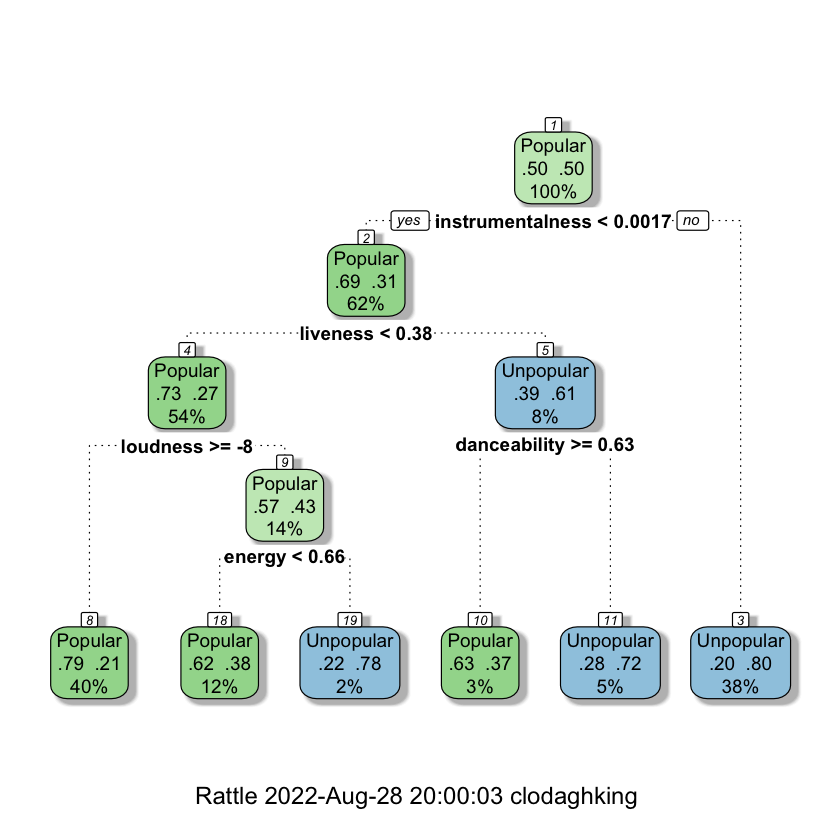

In [461]:
# fancy pruned tree
fancyRpartPlot(optimal_tree)

In [457]:
#predictions of the test data 
optimalpred <- predict(optimal_tree, test, type = 'class')
confusionMatrix(optimalpred , test$popularity1, mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular      1380       523
  Unpopular     342      1230
                                          
               Accuracy : 0.7511          
                 95% CI : (0.7364, 0.7654)
    No Information Rate : 0.5045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5026          
                                          
 Mcnemar's Test P-Value : 9.347e-10       
                                          
            Sensitivity : 0.8014          
            Specificity : 0.7017          
         Pos Pred Value : 0.7252          
         Neg Pred Value : 0.7824          
              Precision : 0.7252          
                 Recall : 0.8014          
                     F1 : 0.7614          
             Prevalence : 0.4955          
         Detection Rate : 0.3971          
   Detection Prevalence : 0.5476       

## Bagging with IPRED

In [432]:
library(ipred) 

In [463]:
# make bootstrapping reproducible
set.seed(123)

# train bagged model
bagged_m1 <- bagging(
  formula = popularity1 ~ .,
  data    = train,
  nbagg=200,
  coob    = TRUE
)

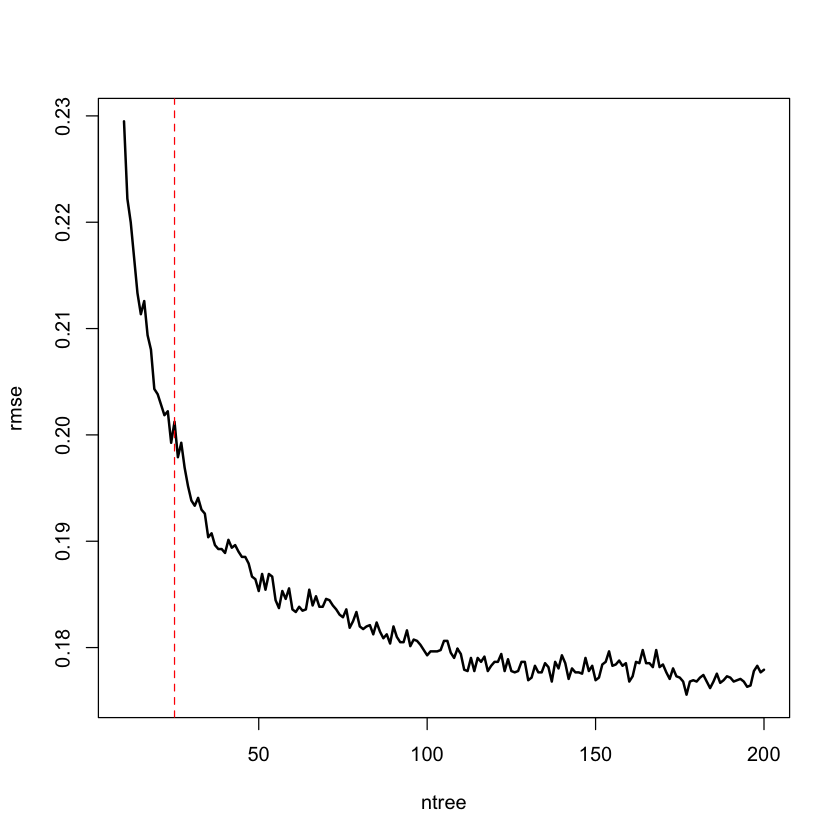

In [464]:
# assess 10-50 bagged trees
ntree <- 10:200

# create empty vector to store OOB RMSE values
rmse <- vector(mode = "numeric", length = length(ntree))

for (i in seq_along(ntree)) {
  # reproducibility
  set.seed(123)
  
  # perform bagged model
  model <- bagging(
  formula = popularity1 ~ .,
  data    = train,
  coob    = TRUE,
  nbagg   = ntree[i]
)
  # get OOB error
  rmse[i] <- model$err
}

plot(ntree, rmse, type = 'l', lwd = 2)
abline(v = 25, col = "red", lty = "dashed")

In [438]:
summary(bagged_m1)


Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = popularity1 ~ ., data = train, nbagg = 100, 
    coob = TRUE)

Out-of-bag estimate of misclassification error:  0.1793 



In [462]:
# fancy pruned tree
fancyRpartPlot(bagged_m1)

ERROR: Error in fancyRpartPlot(bagged_m1): The model object must be an rpart object. Instead we found: classbagg.


In [435]:
#predictions of the test data 
bagpred <- predict(bagged_m1, test, type = 'class')
confusionMatrix(bagpred , test$popularity1, mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular      1494       349
  Unpopular     228      1404
                                          
               Accuracy : 0.834           
                 95% CI : (0.8212, 0.8462)
    No Information Rate : 0.5045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6681          
                                          
 Mcnemar's Test P-Value : 5.863e-07       
                                          
            Sensitivity : 0.8676          
            Specificity : 0.8009          
         Pos Pred Value : 0.8106          
         Neg Pred Value : 0.8603          
              Precision : 0.8106          
                 Recall : 0.8676          
                     F1 : 0.8381          
             Prevalence : 0.4955          
         Detection Rate : 0.4299          
   Detection Prevalence : 0.5304       

In [ ]:
#ROC Curve

## Bagging with Caret 

Bagged CART 

8105 samples
  13 predictor
   2 classes: 'Popular', 'Unpopular' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7294, 7294, 7295, 7295, 7294, 7294, ... 
Resampling results:

  Accuracy   Kappa    
  0.8222145  0.6443523


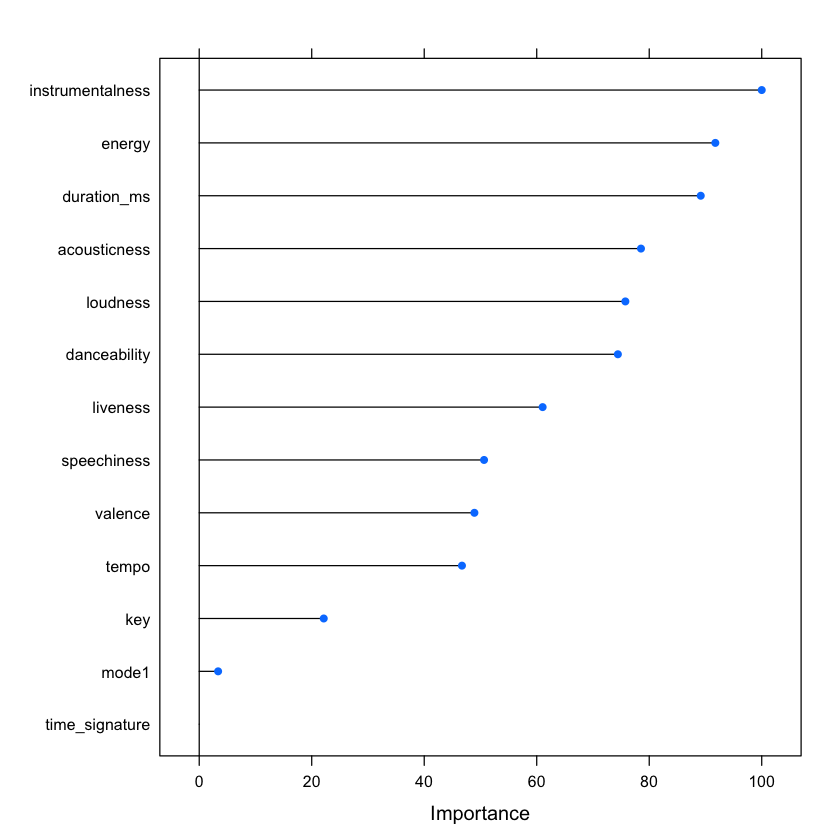

In [444]:
# Specify 10-fold cross validation
ctrl <- trainControl(method = "cv",  number = 10) 

#CV bagged model
bagged_cv <- train(
  popularity1 ~ .,
  data = train,
    nbagg = 200,
  method = "treebag",
  trControl = ctrl,
  importance = TRUE
  )

# assess results
bagged_cv

# plot most important variables
plot(varImp(bagged_cv), 13) 

In [445]:
#predictions of the test data 
bagged_cvpred <- predict(bagged_cv, test, type = 'raw')
confusionMatrix(bagged_cvpred , test$popularity1, mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  Popular Unpopular
  Popular      1504       348
  Unpopular     218      1405
                                          
               Accuracy : 0.8371          
                 95% CI : (0.8244, 0.8493)
    No Information Rate : 0.5045          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6744          
                                          
 Mcnemar's Test P-Value : 5.885e-08       
                                          
            Sensitivity : 0.8734          
            Specificity : 0.8015          
         Pos Pred Value : 0.8121          
         Neg Pred Value : 0.8657          
              Precision : 0.8121          
                 Recall : 0.8734          
                     F1 : 0.8416          
             Prevalence : 0.4955          
         Detection Rate : 0.4328          
   Detection Prevalence : 0.5329       